In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from category_encoders import OrdinalEncoder
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score
from sklearn.metrics import roc_curve

### Logistic Regression

일반적인 선형함수에 시그모이드 함수를 씌운 것
- $ \sigma(x) = \frac{1}{1 + e^{-x}}$ 시그모이드(활성화 함수)

일반적인 선형함수 Wx + b 의 경우 결과값이 $-\infty$ ~ $+\infty$ 지만

시그모이드 함수를 씌우면 결과값이 0 과 1 사이의 '확률'★ 을 가지게 됩니다.
$$\large P(Y=1|X=x)={\frac {1}{1+e^{-(\beta _{0}+\beta _{1}X_{1}+\cdots +\beta _{p}X_{p})}}}$$
$$ 0 \leq P(Y=1|X=x) \leq 1$$

위의 식은 시그모이드에 선형회귀식을 대입한 결과인데, 매우 복잡하여 그림으로 이해해보겠습니다.

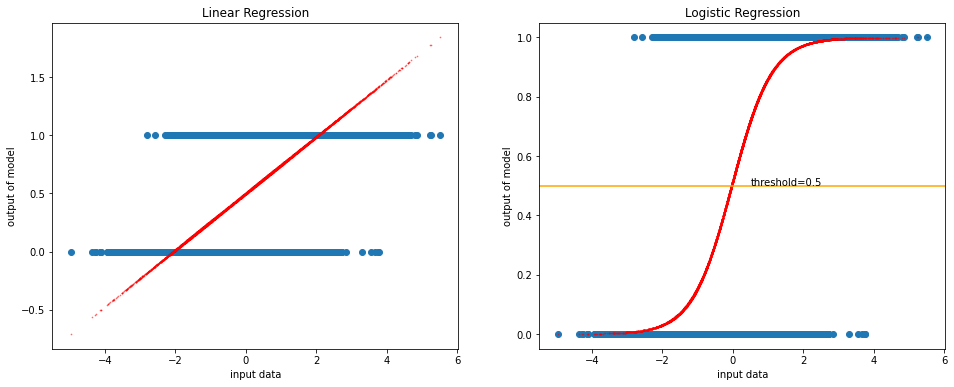

In [9]:
X, y = make_classification(n_samples=10000, n_features=10, random_state=42)
X = pd.DataFrame(data=X)

fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(121)
ax1.scatter(x=X[4], y=y)

# linear regression
ls = LinearRegression()
ls.fit(X[[4]], y)
X['y_pred_lr'] = ls.predict(X[[4]])
ax1.scatter(X[4], X['y_pred_lr'], s = 0.5, color='red', alpha=0.5)
ax1.set_ylabel('output of model')
ax1.set_xlabel('input data')
ax1.set_title('Linear Regression')

# logistic regression
ax2 = fig.add_subplot(122)
ax2.scatter(x=X[4], y=y)

lr = LogisticRegression()
lr.fit(X[[4]], y)

X['y_pred_proba'] = lr.predict_proba(X[[4]])[:,1]
ax2.scatter(X[4], X['y_pred_proba'], s = 0.5, color='red', alpha=0.5)
ax2.axhline(0.5, color='orange')
ax2.text(0.5, 0.5, 'threshold=0.5')
ax2.set_ylabel('output of model')
ax2.set_xlabel('input data')
ax2.set_title('Logistic Regression')

plt.show()

위 의 그림 자료들과 같이 선형회귀에 시그모이드 함수를 씌웠더니 결과값이 0 ~ 1 로 줄어든 것을 확인할 수 있습니다.

Treshold를 0.5 로 잡았을 때 출력값이 0.5 보다 작다면 0을 출력하고, 0.5보다 크다면 1을 출력합니다. (분류)

In [12]:
returns = pd.DataFrame(data = {'probability of 1': lr.predict_proba(X[[4]])[:,1], 'Prediction':lr.predict(X[[4]])})
returns

,probability of 1,Prediction
0,0.770792,1
1,0.718633,1
2,0.911778,1
3,0.974705,1
4,0.761530,1
...,...,...
9995,0.781462,1
9996,0.199444,0
9997,0.119481,0
9998,0.059129,0


실제로도 확률이 0.5인 treshold보다 크다면 1을 출력하고 작으면 0을 출력하는 것을 확인할 수 있습니다.

### odds, logit

대표적인 예시로 동전 던지기(베르누이 분포)가 있다.

$\theta$ = [0, 1] 사이의 성공 확률 일 때,

$P(y | \theta) = Ber(y|\theta) -> (\theta , y = 1) , (1 - \theta , y = 0)$ 

위 식을 뜯어보면 성공확률이 세타라면 y는 1의 값을 갖고, 실패확률이 1 - 세타라면 y 값은 0을 갖는 다는 식이다

odds 는 실패 확률 대비 성공 확률을 의미한다. 

$ Odds(\theta) =  \frac{\theta}{1 - \theta}$ 항상 양수의 값이 나오겠다.

logit은 odds에 로그를 씌운 것이다. odds가 항상 양수이기에 가능. (진수조건)

$ logodds(\theta) = log(\frac{\theta}{1 - \theta}) -> log\theta - log(1 - \theta) $ 로 표현할 수 있다.

$ logit(\theta) = \eta 면, \theta = \sigma(\eta) = \frac{1}{1+ \exp(-\eta)}  $ 라고 표현할 수 있다.

위 식에서 $ \sigma(\eta) $ 를 "시그모이드 함수" 라고 한다.

$n(이타) = \omega_{0} + \omega_{1}x_{1} + \omega_{2}x_{2} + ... +\omega_{n}x_{n}$


우리가 많이 봐온 선형 모델 식이다. 이타는 가중치 W 와 속성 x의 inner product 이다.

x가 x1, x2, x3, ... xn 으로 이루어진 행렬이고, W 도 W1, W2, W3, ... , Wn 으로 이루어진 행렬이다.

이 때 이타는 두 행렬의 곱인 < w , x > 이다. note (W 와 x 는 원소가 아님. 행렬임에 유의)

$ y_{n} = \omega_{0} + \omega_{1}x_{1} + \omega_{2}x_{2} + \epsilon $ 이 식에서

$ \epsilon $ 은 관측 불가능한 속성의 오차값, $ \omega_{0} $ 는 bias 다.

예를 들어서 설명을 해보면, 올리브영에서 상품을 살 확률을 위의 식으로 구해본다면,

x1 = 월 소득, x2 = 성별 (여자1, 남자0)

가중치는 W0 = 0.5, W1 = -0.01, W2 = 1.1 이라 하자.

이 때 월 소득이 200 만원인 여자가 올리브 영에서 물건을 살 확률을 계산해보면,

0.08 -> 8% 가 나온다.

이를 통해서 우리는 로지스틱 회귀는 분류기이고, 확률로 결과를 도출하기 때문에 해석이 쉽다는 장점이 있다.

2 개 이상의 분류에도 사용 가능하고, 비 선형적이여도 적용 가능하다.


In [13]:
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/heart_2020_cleaned.csv')

In [15]:
df['HeartDisease'] = df['HeartDisease'].replace({'No':0, 'Yes':1})

y = df['HeartDisease']
X = df.drop('HeartDisease', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, stratify=y_train)

In [16]:
# mode(): Return the highest frequency value in a Series.
base_major = y_train.mode()[0]
y_pred_base = [base_major] * len(y_train)

In [22]:
logipipe = Pipeline([('ordinalencoder', OrdinalEncoder()),
                     ('logisticregression', LogisticRegression(
                          random_state = 42, class_weight = "balanced",
                          n_jobs = -1, l1_ratio = 0.01          
                        ))])
                  
logipipe.fit(X_train, y_train)

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Smoking', 'AlcoholDrinking', 'Stroke',
                                      'DiffWalking', 'Sex', 'AgeCategory',
                                      'Race', 'Diabetic', 'PhysicalActivity',
                                      'GenHealth', 'Asthma', 'KidneyDisease',
                                      'SkinCancer'],
                                mapping=[{'col': 'Smoking',
                                          'data_type': dtype('O'),
                                          'mapping': Yes    1
No     2
NaN   -2
dtype: int64},
                                         {'col': 'AlcoholDrinking',
                                          'data_type': dtype('O'),
                                          'map...
dtype: int64},
                                         {'col': 'Asthma',
                                          'data_type': dtype('O'),
                                          'mapping': No     1
Yes    2
NaN   -2
dtype: int64},
                                         {'col': 'KidneyDisease',
                                          'data_type': dtype('O'),
                                          'mapping': No     1
Yes    2
NaN   -2
dtype: int64},
                                         {'col': 'SkinCancer',
                                          'data_type': dtype('O'),
                                          'mapping': Yes    1
No     2
NaN   -2
dtype: int64}])),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', l1_ratio=0.01,
                                    n_jobs=-1, random_state=42))])

In [23]:
roc_auc_score(y_test, logipipe.predict_proba(X_test)[:,1])

0.7949894013836581

In [26]:
fpr, tpr, thresholds = roc_curve(y_train, logipipe.predict_proba(X_train)[:,1])

roc = pd.DataFrame({
    'FPR(Fall-out)': fpr, 
    'TPR(Recall)': tpr, 
    'Threshold': thresholds
})
roc

,FPR(Fall-out),TPR(Recall),Threshold
0,0.000000,0.000000,1.996554
1,0.000006,0.000000,0.996554
2,0.000006,0.000065,0.995944
3,0.000012,0.000065,0.995742
4,0.000012,0.000130,0.995410
...,...,...,...
33864,0.998881,0.999935,0.048204
33865,0.998894,0.999935,0.048175
33866,0.999763,0.999935,0.038862
33867,0.999763,1.000000,0.038772


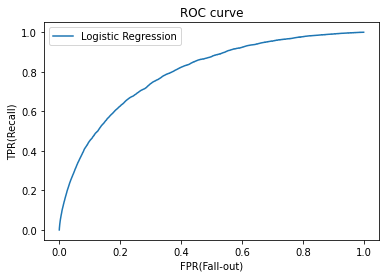

In [35]:
plt.plot(fpr, tpr, label='Logistic Regression')
#plt.axhline(0.5, color = 'orange')
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')
plt.legend();

ROC Curve는 여러 임계값에 대해 TPR(True Positive Rate, recall)과 FPR(False Positive Rate)을 그래프로 보여줍니다.

#### AUC
- ROC 곡선 아래의 면적을 이용하면 분류 모델의 성능을 나타내는 지표를 구할 수 있습니다. 이를 **AUC(area under the curve)** 라고 합니다.
- 일반적으로 AUC 값이 1에 가까울수록 성능이 좋은 모델이며 0.5에 가까울수록 성능이 안 좋은 모델입니다. 

<img src = "https://drive.google.com/uc?id=1o1Wtk0CaozHiXH-AxAH1wjUbJjigUCno" width = 500 height = 300>

**Recall(재현율) = Sensitivity(민감도)** = ${\displaystyle \mathrm {TPR} ={\frac {\mathrm {TP} }{\mathrm {P} }}={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FN} }}=1-\mathrm {FNR} }$

**Fall-out(위양성률)** = ${\displaystyle \mathrm {FPR} ={\frac {\mathrm {FP} }{\mathrm {N} }}={\frac {\mathrm {FP} }{\mathrm {FP} +\mathrm {TN} }}=1-\mathrm {TNR(Specificity)} }$

- 재현율을 높이기 위해서는 Positive로 판단하는 임계값(threshold)을 계속 낮추어 모두 Positive로 판단하게 만들면 됩니다.하지만 이렇게 하면 동시에 Negative이지만 Positive로 판단하는 위양성률도 같이 높아집니다.
    - 임계값이 1인 경우 TPR, FPR 모두 0이 됩니다. 
    - 임계값이 0인 경우 TPR, FPR 모두 1이 됩니다.  

AUC는 Roc Curve 아래의 면적이라는 의미이지만 아래 그림을 통해 조금 더 깊게 이해해봅시다.  

<img src = "https://ifh.cc/g/QyBacs.jpg" width="60%">

- 위의 그림에서 무작위로 Positive 샘플(green) 하나와 Negative 샘플(red) 하나를 뽑아봅시다.
- 이 때 Positive 샘플의 예측값이 1에 가깝고 Negative 샘플의 예측값이 0에 가까울수록 좋은 모델일 것입니다.
- AUC score는 모델이 Positive 샘플의 예측값을 Negative 샘플의 예측값보다 크게 줄 확률입니다.
    - 위의 그림을 기준으로 생각하면 Positive 샘플을 더 오른쪽에 두고 Negative 샘플을 더 왼쪽에 둘 확률입니다.
    - AUC score가 크다는 것은 Positive 샘플이 위의 그림에서 오른쪽에 있을 확률이 높다는 것이기 때문에 이 모델은 좋은 성능의 분류기라고 판단할 수 있습니다.